# CHAPTER 5.1

## Creating a simple fully connected autoencoder


We'll implement a fully connected autoencoder to reconstruct the images in Fashion-MNIST

In [1]:
import cv2
import numpy as np
from tensorflow.keras import Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import *

In [2]:
# we don't need labels, because it is unsupervised

(X_train, _), (X_test, _) = fashion_mnist.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
print(X_train.shape)

(60000, 28, 28)


Our autoencoder will not be a CNN, because of that we should flatten our images for model

In [3]:

X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
print(X_train.shape)


(60000, 784)


As you can see, we have 60000 images with 784 pixels for each.This is our input shape for autoencoder

In [4]:
def build_autoencoder(input_shape=784, encoding_dim=128):
    input_layer = Input(shape=(input_shape,))
    encoded = Dense(units=512)(input_layer)
    encoded = ReLU()(encoded)
    encoded = Dense(units=256)(encoded)
    encoded = ReLU()(encoded)

    encoded = Dense(encoding_dim)(encoded)
    encoding = ReLU()(encoded)

    decoded = Dense(units=256)(encoding)
    decoded = ReLU()(decoded)
    decoded = Dense(units=512)(decoded)
    decoded = ReLU()(decoded)
    decoded = Dense(units=input_shape)(decoded)
    decoded = Activation('sigmoid')(decoded)

    return Model(input_layer, decoded)

In [5]:
autoencoder = build_autoencoder()

In [6]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 re_lu (ReLU)                (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 re_lu_1 (ReLU)              (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 re_lu_2 (ReLU)              (None, 128)               0     

In [7]:
autoencoder.compile(optimizer='adam', loss='mse')

EPOCHS = 300
BATCH_SIZE = 1024
autoencoder.fit(X_train, X_train,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/300
59/59 [==============================] - 4s 16ms/step - loss: 0.0700 - val_loss: 0.0395
Epoch 2/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0308 - val_loss: 0.0268
Epoch 3/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0245 - val_loss: 0.0277
Epoch 4/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0213 - val_loss: 0.0198
Epoch 5/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0206 - val_loss: 0.0179
Epoch 6/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0173 - val_loss: 0.0167
Epoch 7/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0167 - val_loss: 0.0161
Epoch 8/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0151 - val_loss: 0.0146
Epoch 9/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0145 - val_loss: 0.0139
Epoch 10/300
59/59 [==============================] - 0s 7ms/step - loss: 0.0137 - val_loss: 0.0135
Epoch 11

Epoch 83/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0062 - val_loss: 0.0063
Epoch 84/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0061 - val_loss: 0.0064
Epoch 85/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0061 - val_loss: 0.0063
Epoch 86/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0061 - val_loss: 0.0063
Epoch 87/300
59/59 [==============================] - 0s 7ms/step - loss: 0.0060 - val_loss: 0.0063
Epoch 88/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0061 - val_loss: 0.0063
Epoch 89/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0060 - val_loss: 0.0064
Epoch 90/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0059 - val_loss: 0.0062
Epoch 91/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0060 - val_loss: 0.0061
Epoch 92/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0059 - val_loss: 0.0061


59/59 [==============================] - 0s 8ms/step - loss: 0.0049 - val_loss: 0.0052
Epoch 165/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0049 - val_loss: 0.0052
Epoch 166/300
59/59 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0053
Epoch 167/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0049 - val_loss: 0.0052
Epoch 168/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0049 - val_loss: 0.0052
Epoch 169/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0048 - val_loss: 0.0053
Epoch 170/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0048 - val_loss: 0.0052
Epoch 171/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0048 - val_loss: 0.0054
Epoch 172/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0048 - val_loss: 0.0052
Epoch 173/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0048 - val_loss: 0.0053
Epoc

59/59 [==============================] - 1s 8ms/step - loss: 0.0044 - val_loss: 0.0048
Epoch 246/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0043 - val_loss: 0.0047
Epoch 247/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0043 - val_loss: 0.0047
Epoch 248/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0043 - val_loss: 0.0047
Epoch 249/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0043 - val_loss: 0.0051
Epoch 250/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0043 - val_loss: 0.0047
Epoch 251/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0043 - val_loss: 0.0047
Epoch 252/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0043 - val_loss: 0.0047
Epoch 253/300
59/59 [==============================] - 1s 9ms/step - loss: 0.0043 - val_loss: 0.0047
Epoch 254/300
59/59 [==============================] - 0s 8ms/step - loss: 0.0043 - val_loss: 0.0047
Epoc

In [8]:
predictions = autoencoder.predict(X_test)

In [10]:
predictions.shape

(10000, 784)

In [11]:
#reshape for shing them as image
original_shape = (X_test.shape[0], 28, 28)
predictions = predictions.reshape(original_shape)
X_test = X_test.reshape(original_shape)

In [14]:
def plot_original_vs_generated(original, generated):
    num_images = 15
    sample = np.random.randint(0, len(original), num_images)

    def stack(data):
        images = data[sample]
        return np.vstack([np.hstack(images[:5]),
                          np.hstack(images[5:10]),
                          np.hstack(images[10:15])])

    def add_text(image, text, position):
        pt1 = position
        pt2 = (pt1[0] + 10 + (len(text) * 22),
               pt1[1] - 45)
        cv2.rectangle(image,
                      pt1,
                      pt2,
                      (255, 255, 255),
                      -1)
        cv2.putText(image, text,
                    position,
                    fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale=1.3,
                    color=(0, 0, 0),
                    thickness=4)

    original = stack(original)
    generated = stack(generated)

    mosaic = np.vstack([original,
                        generated])
    mosaic = cv2.resize(mosaic, (800, 800),
                        interpolation=cv2.INTER_AREA)
    mosaic = cv2.cvtColor(mosaic, cv2.COLOR_GRAY2BGR)

    add_text(mosaic, 'Original', (20, 80))
    add_text(mosaic, 'Generated', (20, 500))

    cv2.imshow('Mosaic', mosaic)
    cv2.waitKey(0)

In [15]:
plot_original_vs_generated(X_test, predictions)

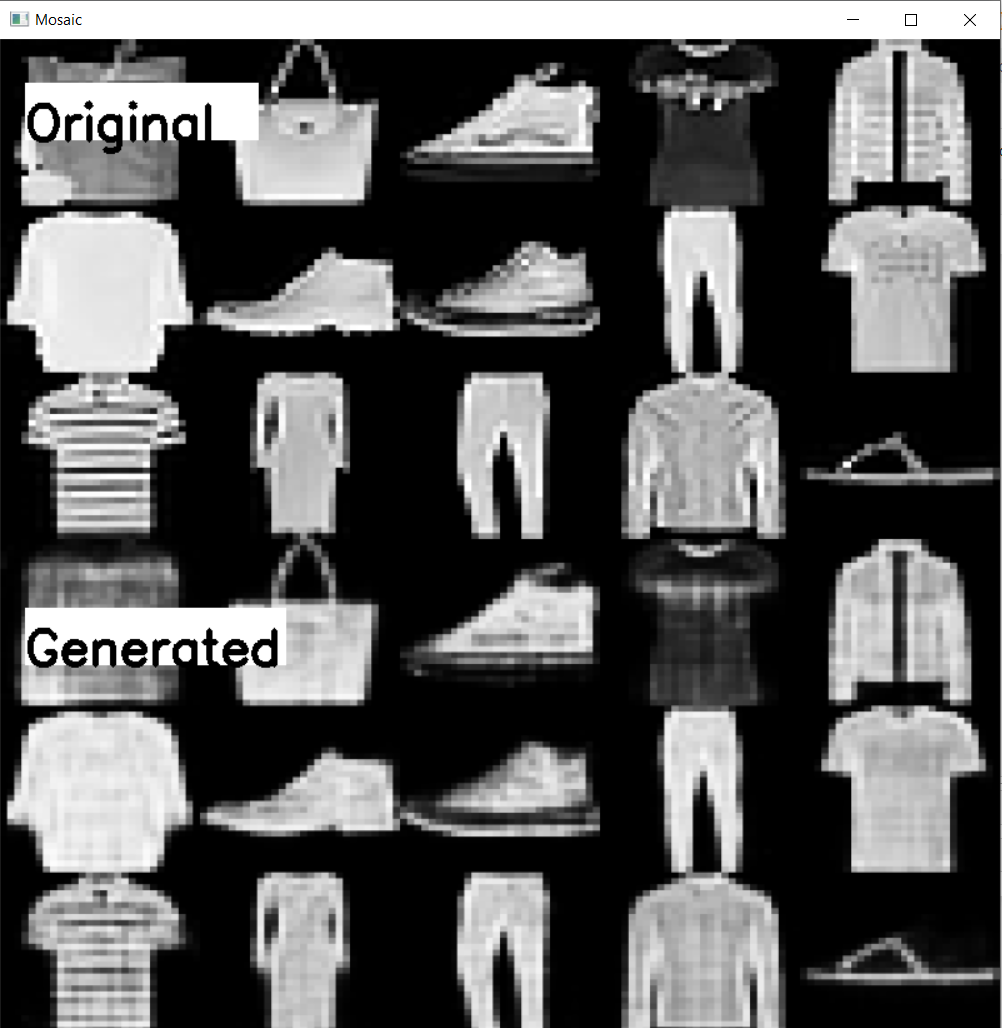

The reconstraction was not bad, but it is not enough for details... For this purpose we need powerful autoencoders with CNN